In [6]:
# Import Pandas and NumPy.
import pandas as pd
import numpy as np

In [7]:
# Read CSV file from the current working directory.
ad = pd.read_csv('actual_duration.csv')

ar = pd.read_csv('appointments_regional.csv')

nc = pd.read_excel('national_categories.xlsx')

## Creating visualisations

In [8]:
#Need to import more packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Objective 1 ##


In [9]:
#Change appointment_month to string 
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'])

#Confirming that the appointment month dtype has changed from object to datetime
print(nc.dtypes)

#Can see physically that the appointment month format has changed
print(nc)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month        datetime64[ns]
dtype: object
       appointment_date icb_ons_code  \
0            2021-08-02    E54000050   
1            2021-08-02    E54000050   
2            2021-08-02    E54000050   
3            2021-08-02    E54000050   
4            2021-08-02    E54000050   
...                 ...          ...   
817389       2022-06-30    E54000054   
817390       2022-06-30    E54000054   
817391       2022-06-30    E54000054   
817392       2022-06-30    E54000054   
817393       2022-06-30    E54000054   

                             sub_icb_location_name            service_setting  \
0       NHS North East and North Cumbria ICB - 00L       Primary Care Network   
1       NHS North East 

Plot for Service Setting

In [10]:
#Aggregate the appointments per month and determine the sum of the records per month
nc_ss = nc.groupby(['service_setting','appointment_month']).sum(['count_of_appointments'])

#View the sum of the records per month for each service setting
print(nc_ss)

                                             count_of_appointments
service_setting           appointment_month                       
Extended Access Provision 2021-08-01                        160927
                          2021-09-01                        187906
                          2021-10-01                        209539
                          2021-11-01                        207577
                          2021-12-01                        173504
                          2022-01-01                        186375
                          2022-02-01                        196627
                          2022-03-01                        231905
                          2022-04-01                        192284
                          2022-05-01                        220511
                          2022-06-01                        209652
General Practice          2021-08-01                      21575852
                          2021-09-01                      2594

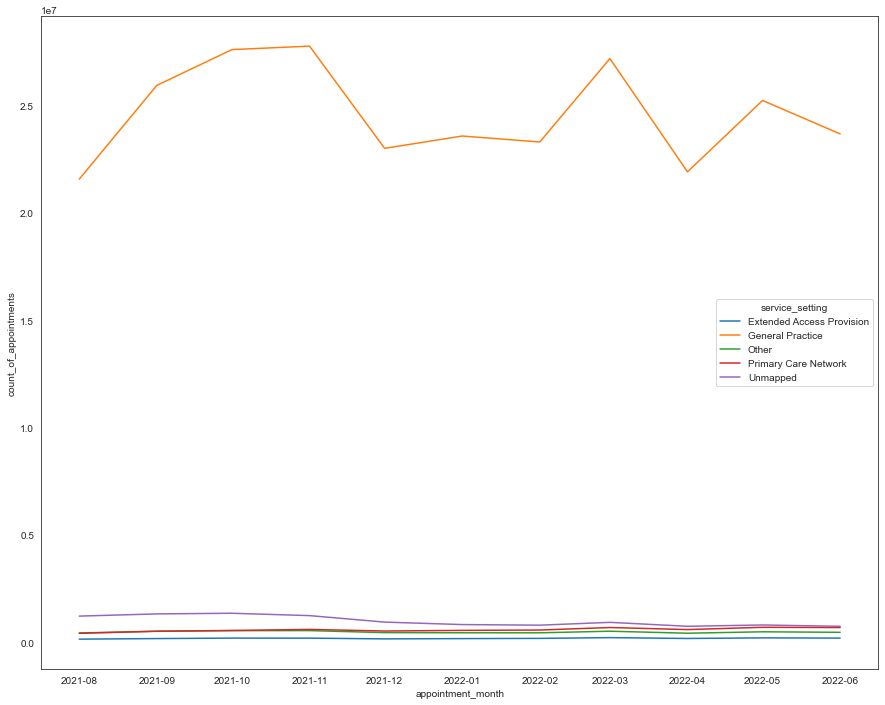

In [11]:
#Create a lineplot
plt.figure(figsize=(15, 12))
# Set the colour/plot style.
sns.set_style('white')


sns.lineplot(x='appointment_month', y='count_of_appointments',
             hue='service_setting', data=nc_ss, ci=None)

#save plot
plt.savefig('Service_Setting.png')

Plot for context type

In [12]:
##Doing the same lineplot for context types
#Aggregate the appointments per month and determine the sum of the records per month
nc_ct = nc.groupby(['context_type','appointment_month']).sum(['count_of_appointments'])

#View the sum of the records per month for each context type
print(nc_ct)

                                          count_of_appointments
context_type           appointment_month                       
Care Related Encounter 2021-08-01                      20255235
                       2021-09-01                      24404251
                       2021-10-01                      26125201
                       2021-11-01                      26282778
                       2021-12-01                      21798612
                       2022-01-01                      22441947
                       2022-02-01                      22211021
                       2022-03-01                      25928850
                       2022-04-01                      20904193
                       2022-05-01                      24101243
                       2022-06-01                      22621827
Inconsistent Mapping   2021-08-01                       2363093
                       2021-09-01                       2782135
                       2021-10-01       

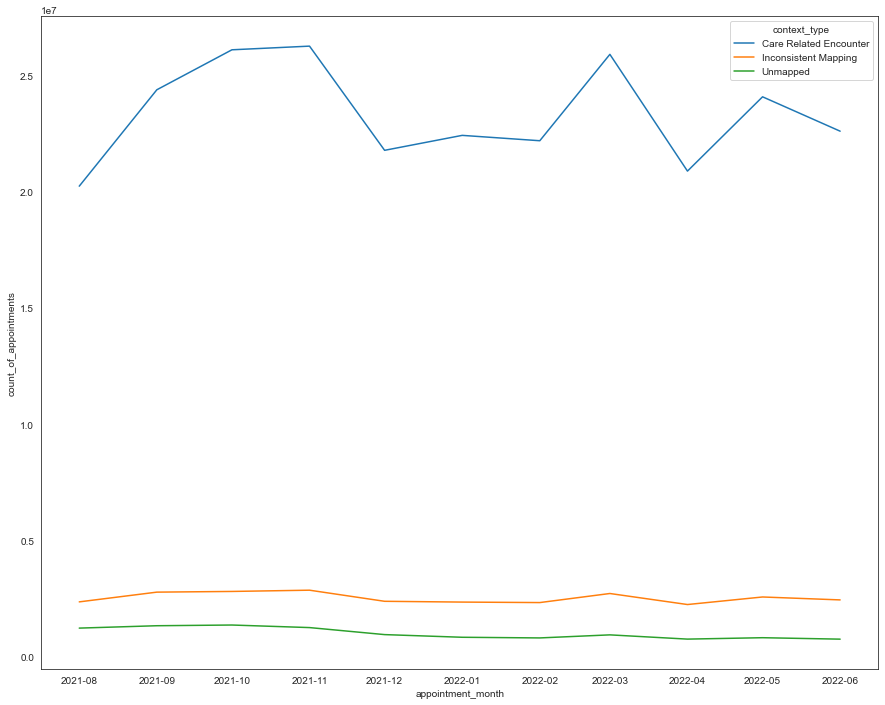

In [13]:
#Create a lineplot2

plt.figure(figsize=(15, 12))

# Set the colour/plot style.
sns.set_style('white')


sns.lineplot(x='appointment_month', y='count_of_appointments',
             hue='context_type', data=nc_ct, ci=None)

#save plot
plt.savefig('Context_type.png')

Plot for national categories

In [14]:
##Doing the same lineplot for national categories types
#Aggregate the appointments per month and determine the sum of the records per month
nc_nc = nc.groupby(['national_category','appointment_month']).sum(['count_of_appointments'])

#View the sum of the records per month for each national category
print(nc_nc)

                                                                      count_of_appointments
national_category                                  appointment_month                       
Care Home Needs Assessment & Personalised Care ... 2021-08-01                         29676
                                                   2021-09-01                         33503
                                                   2021-10-01                         32441
                                                   2021-11-01                         38827
                                                   2021-12-01                         34653
...                                                                                     ...
Walk-in                                            2022-02-01                         31665
                                                   2022-03-01                         38070
                                                   2022-04-01                   

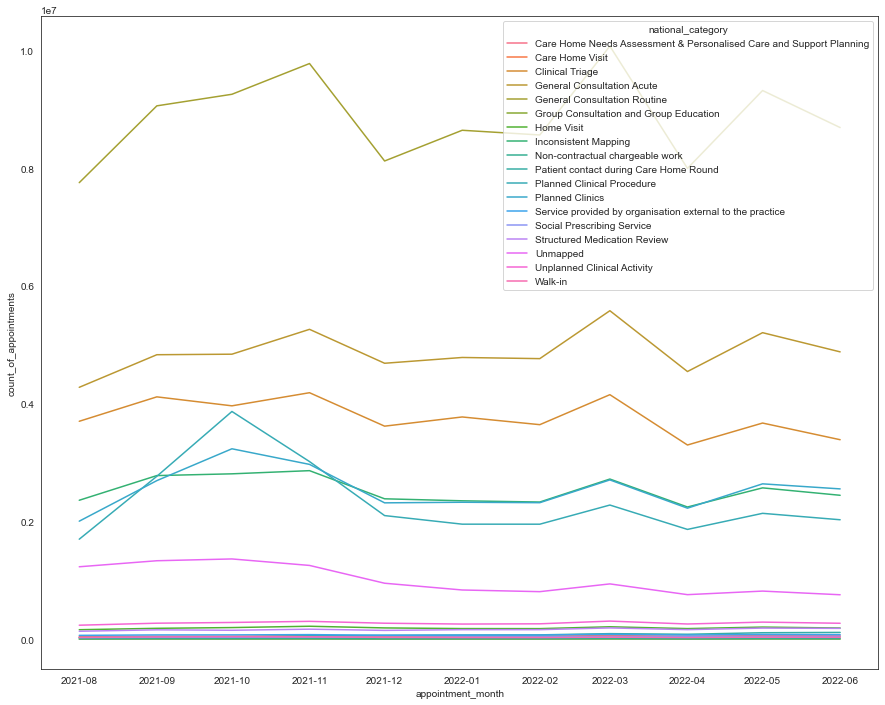

In [15]:
#Create a lineplot2
plt.figure(figsize=(15, 12))

# Set the colour/plot style.
sns.set_style('white')

sns.lineplot(x='appointment_month', y='count_of_appointments',
             hue='national_category', data=nc_nc, ci=None)

#save plot
plt.savefig('National_categories.png')

# Objective 2


In [16]:
#Aggregate the appointments per month and determine the sum of the records per month
nc_ss_day = nc.groupby(['service_setting','appointment_month','appointment_date']).sum(['count_of_appointments']).reset_index()

#View the sum of the records per month for each service setting
print(nc_ss_day)

                service_setting appointment_month appointment_date  \
0     Extended Access Provision        2021-08-01       2021-08-01   
1     Extended Access Provision        2021-08-01       2021-08-02   
2     Extended Access Provision        2021-08-01       2021-08-03   
3     Extended Access Provision        2021-08-01       2021-08-04   
4     Extended Access Provision        2021-08-01       2021-08-05   
...                         ...               ...              ...   
1665                   Unmapped        2022-06-01       2022-06-26   
1666                   Unmapped        2022-06-01       2022-06-27   
1667                   Unmapped        2022-06-01       2022-06-28   
1668                   Unmapped        2022-06-01       2022-06-29   
1669                   Unmapped        2022-06-01       2022-06-30   

      count_of_appointments  
0                       438  
1                      7705  
2                      7820  
3                      6917  
4        

In [17]:
nc_ss_day.head(5)

,service_setting,appointment_month,appointment_date,count_of_appointments
0,Extended Access Provision,2021-08-01,2021-08-01,438
1,Extended Access Provision,2021-08-01,2021-08-02,7705
2,Extended Access Provision,2021-08-01,2021-08-03,7820
3,Extended Access Provision,2021-08-01,2021-08-04,6917
4,Extended Access Provision,2021-08-01,2021-08-05,6841


In [18]:
nc_ss_day.columns

Index(['service_setting', 'appointment_month', 'appointment_date',
       'count_of_appointments'],
      dtype='object')

Creating plots:

1. Summer plot - August 2021

In [19]:
#New Dataframe for Summer
nc_ss_daysum = nc_ss_day[(nc_ss_day['appointment_month'] == '2021-08')]

print(nc_ss_daysum)

nc_ss_daysum.columns

                service_setting appointment_month appointment_date  \
0     Extended Access Provision        2021-08-01       2021-08-01   
1     Extended Access Provision        2021-08-01       2021-08-02   
2     Extended Access Provision        2021-08-01       2021-08-03   
3     Extended Access Provision        2021-08-01       2021-08-04   
4     Extended Access Provision        2021-08-01       2021-08-05   
...                         ...               ...              ...   
1362                   Unmapped        2021-08-01       2021-08-27   
1363                   Unmapped        2021-08-01       2021-08-28   
1364                   Unmapped        2021-08-01       2021-08-29   
1365                   Unmapped        2021-08-01       2021-08-30   
1366                   Unmapped        2021-08-01       2021-08-31   

      count_of_appointments  
0                       438  
1                      7705  
2                      7820  
3                      6917  
4        

Index(['service_setting', 'appointment_month', 'appointment_date',
       'count_of_appointments'],
      dtype='object')

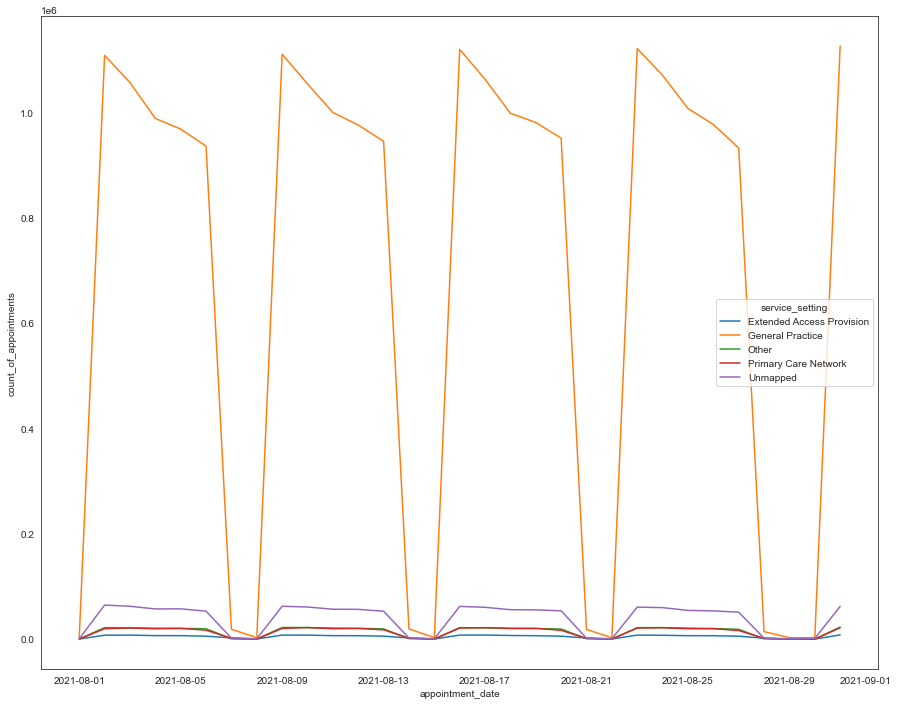

In [20]:
#Create plot size.
plt.figure(figsize=(15, 12))

# Set the colour/plot style.
sns.set_style('white')

#create lineplot
sns.lineplot(x='appointment_date', y='count_of_appointments', 
             hue='service_setting',
             data=nc_ss_daysum, ci=None)

#save plot
plt.savefig('Summer.png')

2. Autumn plot - October 2021

In [21]:
#New Dataframe for Autumn 
nc_ss_dayaut = nc_ss_day[(nc_ss_day['appointment_month'] == '2021-10')]

print(nc_ss_dayaut)

nc_ss_dayaut.columns

                service_setting appointment_month appointment_date  \
61    Extended Access Provision        2021-10-01       2021-10-01   
62    Extended Access Provision        2021-10-01       2021-10-02   
63    Extended Access Provision        2021-10-01       2021-10-03   
64    Extended Access Provision        2021-10-01       2021-10-04   
65    Extended Access Provision        2021-10-01       2021-10-05   
...                         ...               ...              ...   
1423                   Unmapped        2021-10-01       2021-10-27   
1424                   Unmapped        2021-10-01       2021-10-28   
1425                   Unmapped        2021-10-01       2021-10-29   
1426                   Unmapped        2021-10-01       2021-10-30   
1427                   Unmapped        2021-10-01       2021-10-31   

      count_of_appointments  
61                     7107  
62                     7683  
63                      540  
64                     9128  
65       

Index(['service_setting', 'appointment_month', 'appointment_date',
       'count_of_appointments'],
      dtype='object')

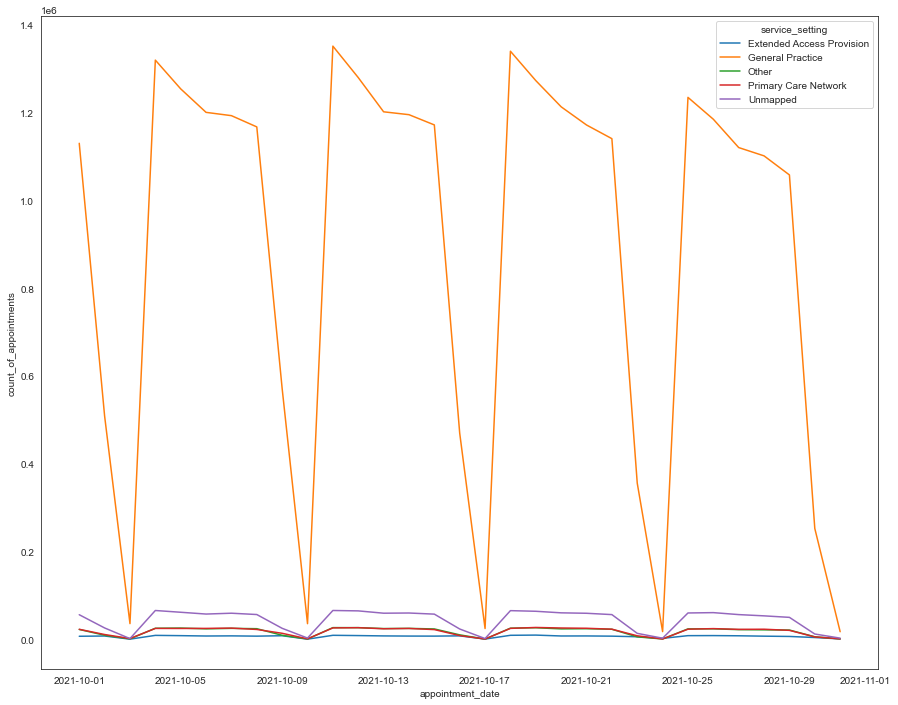

In [22]:
#Create plot size.
plt.figure(figsize=(15, 12))

# Set the colour/plot style.
sns.set_style('white')

#Create lineplot
sns.lineplot(x='appointment_date', y='count_of_appointments', 
             hue='service_setting',
             data=nc_ss_dayaut, ci=None)

#save plot
plt.savefig('Autumn.png')

3. Winter plot - Janurary 2022 

In [23]:
#New Dataframe for winter
nc_ss_daywin = nc_ss_day[(nc_ss_day['appointment_month'] == '2022-01')]

print(nc_ss_daywin)

nc_ss_daywin.columns

                service_setting appointment_month appointment_date  \
153   Extended Access Provision        2022-01-01       2022-01-01   
154   Extended Access Provision        2022-01-01       2022-01-02   
155   Extended Access Provision        2022-01-01       2022-01-03   
156   Extended Access Provision        2022-01-01       2022-01-04   
157   Extended Access Provision        2022-01-01       2022-01-05   
...                         ...               ...              ...   
1515                   Unmapped        2022-01-01       2022-01-27   
1516                   Unmapped        2022-01-01       2022-01-28   
1517                   Unmapped        2022-01-01       2022-01-29   
1518                   Unmapped        2022-01-01       2022-01-30   
1519                   Unmapped        2022-01-01       2022-01-31   

      count_of_appointments  
153                     246  
154                     403  
155                     397  
156                    8769  
157      

Index(['service_setting', 'appointment_month', 'appointment_date',
       'count_of_appointments'],
      dtype='object')

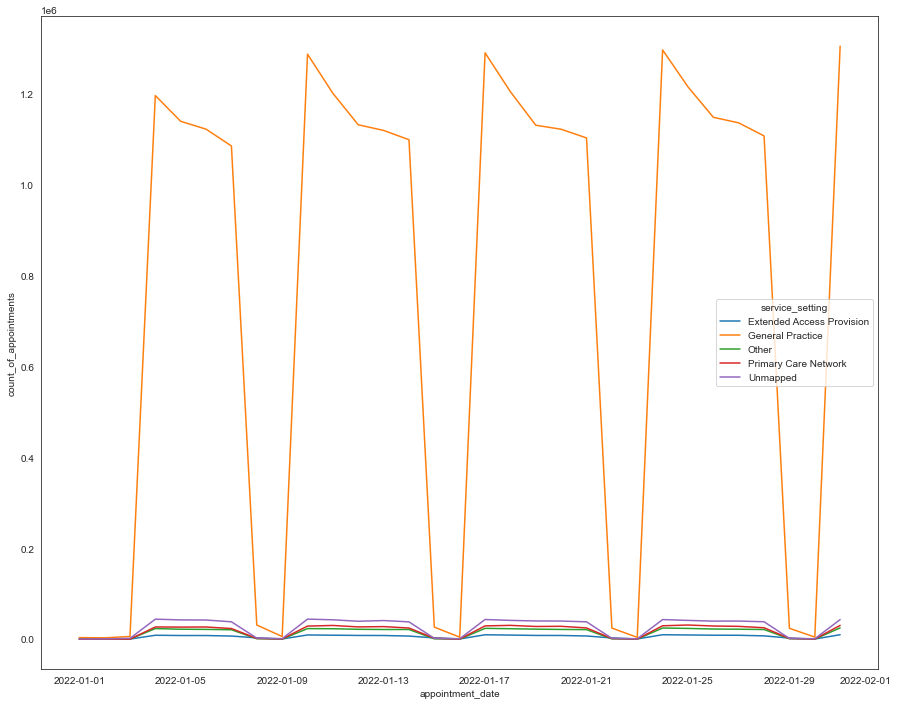

In [24]:
#Create plot size.
plt.figure(figsize=(15, 12))

# Set the colour/plot style.
sns.set_style('white')

#Create lineplot
sns.lineplot(x='appointment_date', y='count_of_appointments', 
             hue='service_setting',
             data=nc_ss_daywin, ci=None)

#save plot
plt.savefig('Winter.png')

4. Spring plot - April 2022

In [25]:
#New Dataframe for Spring 
nc_ss_dayspr = nc_ss_day[(nc_ss_day['appointment_month'] == '2022-04')]

nc_ss_dayspr

nc_ss_dayspr.columns

Index(['service_setting', 'appointment_month', 'appointment_date',
       'count_of_appointments'],
      dtype='object')

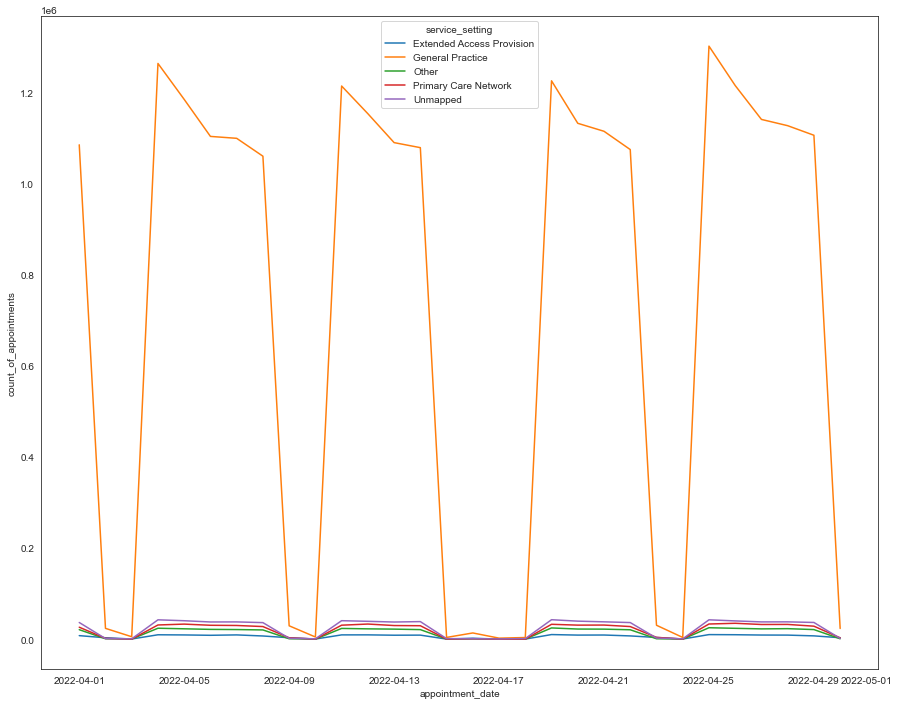

In [26]:
#Create plot size.
plt.figure(figsize=(15, 12))

# Set the colour/plot style.
sns.set_style('white')

#Create lineplot
sns.lineplot(x='appointment_date', y='count_of_appointments', 
             hue='service_setting',
             data=nc_ss_dayspr, ci=None)

#save plot
plt.savefig('Spring.png')